# Getting started with the analysis of nvg data
This notebook assumes that data exists in a database in the hdf5 format. For instructions how to set up the database with data see [../readme.md].

## The approximate orientation of the IMUs
The IMUs has its local z-axis pointing out of the box, and its local x-axis pointing in the long direction. The IMUs were strapped to the body with the positive local x-direction pointing downwards along the main axis of the segment. The z-axis was approximately pointing outwards from the body, normal to the sagittal plane. 

## Import modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import nvg.ximu.ximudata as ximudata
%matplotlib notebook

## Load the database

In [2]:
reload(ximudata)
dbfilename = "/home/kjartan/Dropbox/Public/nvg201209.hdf5"
db = ximudata.NVGData(dbfilename);

## Explore contents of the database file

In [3]:
dbfile = db.hdfFile;
print "Subjects: ",  dbfile.keys()
print "Trials: ", dbfile['S5'].keys()
print "IMUs: ", dbfile['S5/B'].keys()
print "Attributes of example trial", dbfile['S5/B'].attrs.keys()
print "Shape of example IMU data entry", dbfile['S5/B/N'].shape


Subjects:  [u'S10', u'S11', u'S12', u'S2', u'S3', u'S4', u'S5', u'S6', u'S7', u'S8', u'S9']
Trials:  [u'B', u'D', u'M', u'N']
IMUs:  [u'B', u'LA', u'LH', u'LT', u'N', u'RA', u'RH', u'RT']
Attributes of example trial [u'PNAtICLA', u'PNAtICRA', u'PNAtCycleEvents', u'cycleFrequency', u'verticalDisplacement']
Shape of example IMU data entry (87243, 10)


## The content of the raw IMU file
The columns of the IMU data contain: 
<ol start="0">
  <li>Packet number</li>
  <li>Gyroscope X (deg/s)</li>
  <li>Gyroscope Y (deg/s)</li>
  <li>Gyroscope Z (deg/s)</li>
  <li>Accelerometer X (g)</li>
  <li>Accelerometer Y (g)</li>
  <li>Accelerometer Z (g)</li>
  <li>Magnetometer X (G)</li>
  <li>Magnetometer Y (G)</li>
  <li>Magnetometer Z (G)</li>
</ol>

## Plot example data


<IPython.core.display.Javascript object>


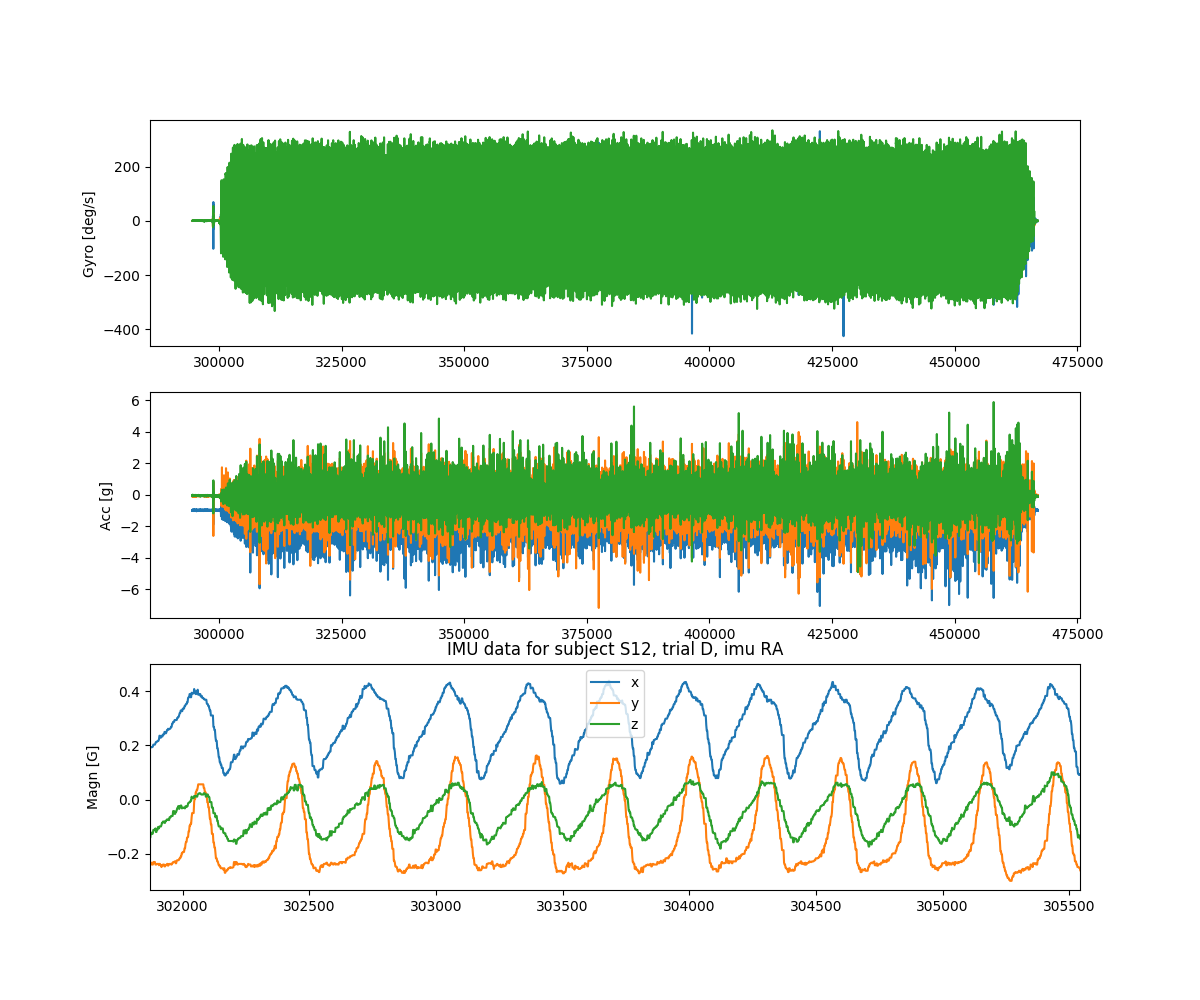

<HDF5 dataset "RA": shape (84223, 10), type "<f8">

In [5]:
db.plot_imu_data("S12", "D", "RA")

## Implemented analysis methods 

In [ ]:
print [s for s in dir(db) if s.startswith("get")]

## Try an analysis

In [3]:
db.get_angle_to_vertical_markers(subject="S4")

2012-09-19 11:30:58.122000
2012-09-19, 09:53:12.302938


[]

In [ ]:
res = db.apply_to_all_trials(db.get_RoM_angle_to_vertical, {'imu':'LH'},
                                           subjlist=['S4', 'S6'], triallist=['B', 'N'])

In [ ]:
res = db.apply_to_all_trials(db.get_angle_to_vertical_markers, {'imu':'LH'},
                                           subjlist=['S4', 'S6'], triallist=['B', 'N'])